In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
raw_data =pd.read_csv("Car details v3.csv")

In [15]:
def PercentageofMissingData(dataset):
    return dataset.isna().sum()/len(dataset*100)
print(raw_data.isnull().sum())
print()
print(PercentageofMissingData(raw_data))

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.027190
engine           0.027190
max_power        0.026452
torque           0.027313
seats            0.027190
dtype: float64


In [16]:
raw_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [17]:
raw_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [18]:
raw_data.dropna(inplace=True, axis=0, how='any')
raw_data.duplicated().sum()
raw_data.drop_duplicates(inplace=True)

In [19]:
raw_data['mileage']=raw_data['mileage'].replace(' kmpl','',regex=True).str.replace(',', '')
raw_data['mileage']=raw_data['mileage'].replace(' km/kg','',regex=True).str.replace(',', '')
raw_data['engine']=raw_data['engine'].replace(' CC','',regex=True).str.replace(',', '')
raw_data['max_power']=raw_data['max_power'].replace(' bhp','',regex=True).str.replace(',', '')

In [20]:
raw_data['mileage'] = pd.to_numeric(raw_data['mileage'])
raw_data['engine'] = pd.to_numeric(raw_data['engine'])
raw_data['max_power'] = pd.to_numeric(raw_data['max_power'])
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   int64  
 10  max_power      6717 non-null   float64
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 734.7+ KB


In [22]:
import seaborn as sns

Text(0.5, 0, 'Selling_Price')

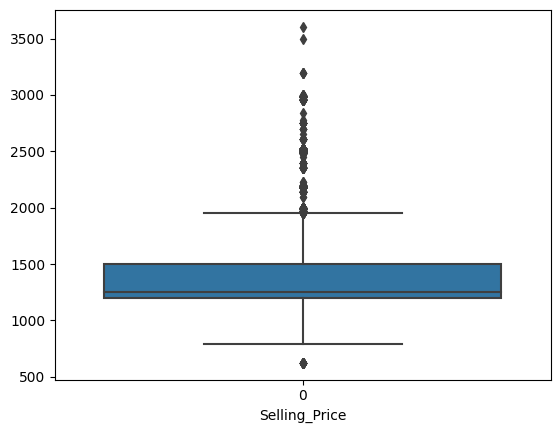

In [23]:
sns.boxplot(raw_data['engine'])
plt.xlabel('Selling_Price')

In [24]:
Q1 = raw_data['engine'].quantile(0.25)
Q3 = raw_data['engine'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

raw_data[raw_data['engine']> upper_limit]
raw_data[raw_data['engine']< lower_limit]

raw_data = raw_data[raw_data['engine'] < upper_limit]
raw_data.shape

(5535, 13)

Text(0.5, 0, 'Selling_Price')

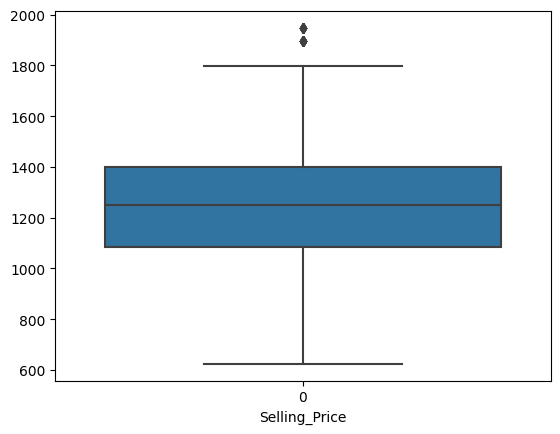

In [25]:
sns.boxplot(raw_data['engine'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

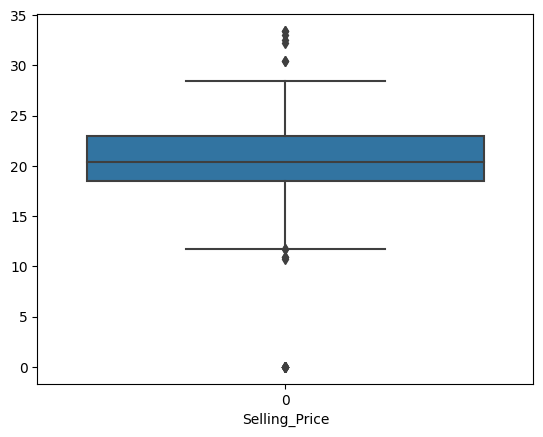

In [26]:
sns.boxplot(raw_data['mileage'])
plt.xlabel('Selling_Price')

In [27]:
Q1 = raw_data['mileage'].quantile(0.25)
Q3 = raw_data['mileage'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

raw_data[raw_data['mileage']> upper_limit]
raw_data[raw_data['mileage']< lower_limit]

raw_data = raw_data[raw_data['mileage'] < upper_limit]
raw_data.shape

(5528, 13)

In [28]:
Q1 = raw_data['max_power'].quantile(0.25)
Q3 = raw_data['max_power'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

raw_data[raw_data['max_power']> upper_limit]
raw_data[raw_data['max_power']< lower_limit]

raw_data = raw_data[raw_data['max_power'] < upper_limit]
raw_data.shape

(5275, 13)

Text(0.5, 0, 'Selling_Price')

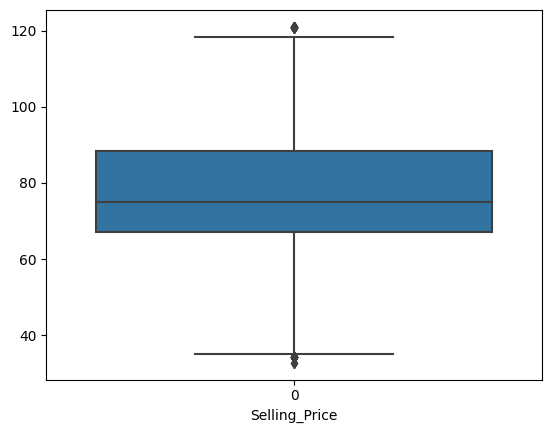

In [29]:
sns.boxplot(raw_data['max_power'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

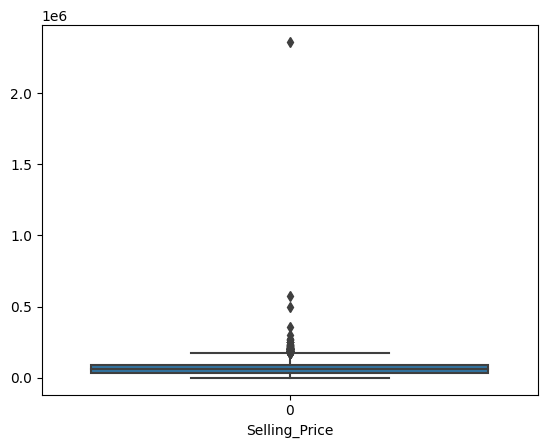

In [30]:
sns.boxplot(raw_data['km_driven'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

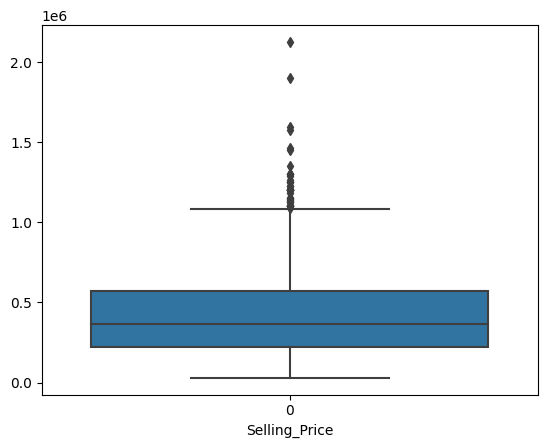

In [31]:
sns.boxplot(raw_data['selling_price'])
plt.xlabel('Selling_Price')

In [32]:
Q1 = raw_data['selling_price'].quantile(0.25)
Q3 = raw_data['selling_price'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

raw_data[raw_data['selling_price']> upper_limit]
raw_data[raw_data['selling_price']< lower_limit]

raw_data = raw_data[raw_data['selling_price'] < upper_limit]
raw_data.shape
#raw_data['selling_price'] = raw_data['selling_price'][raw_data['selling_price']\
                                     #.between(raw_data['selling_price'].quantile(.05), \
                                              #raw_data['selling_price'].quantile(.99))]

(5235, 13)

Text(0.5, 0, 'Selling_Price')

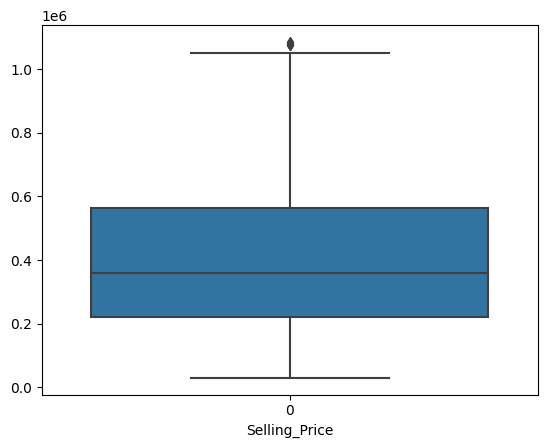

In [33]:
sns.boxplot(raw_data['selling_price'])
plt.xlabel('Selling_Price')

In [34]:
raw_data.dropna(inplace=True, axis=0, how='any')
raw_data.drop_duplicates(inplace=True)
raw_data.duplicated().sum()

0

In [35]:
correlation = raw_data.corr()
correlation

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.727618,-0.372847,0.447784,0.082970,0.288832,0.166494
selling_price,0.727618,1.000000,-0.254891,0.354330,0.386852,0.578964,0.219399
km_driven,-0.372847,-0.254891,1.000000,-0.086001,0.183031,0.008499,0.022040
mileage,0.447784,0.354330,-0.086001,1.000000,-0.097638,-0.053582,-0.097017
engine,0.082970,0.386852,0.183031,-0.097638,1.000000,0.791807,0.208679
max_power,0.288832,0.578964,0.008499,-0.053582,0.791807,1.000000,0.172333
seats,0.166494,0.219399,0.022040,-0.097017,0.208679,0.172333,1.000000


In [36]:
df=raw_data

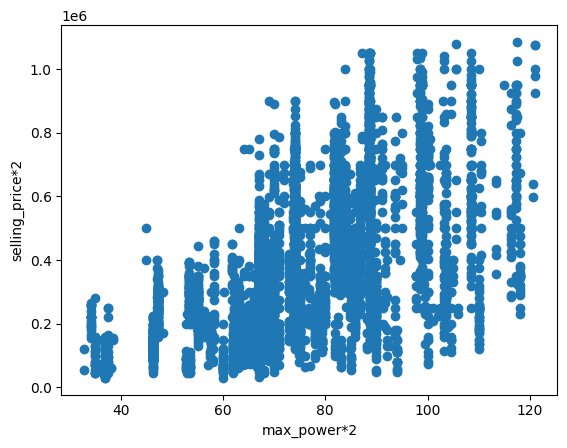

In [38]:
X=df["max_power"].values.astype(float)
Y=df["selling_price"].values.astype(float)
plt.scatter(X,Y)
plt.xlabel("max_power*2")
plt.ylabel("selling_price*2")
plt.show()